# 2019/02/11    - test campaign 2, day 1
##     4.1 Optimize M1-M3-M1 figure (2 iterations)
##    4.2 Measure M1 and M3 bending modes (M1 BM 25-27,2,4,20,22; same for M3)

In [2]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import glob
import pandas as pd

%matplotlib inline
plt.jet()

dateID = 190211

<Figure size 432x288 with 0 Axes>

### Re-start M1-M3-M1 optimization. First, reapply forces from end of campaign one (190125, Friday), see if we can reproduce that surface.

4-1 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190211_4-1 No Temp Comp/M1M3 set0 190211 4-1.h5: Mon Feb 11 09:24:12 2019 
/Processed/190211_4-1 No Temp Comp/M1M3 set0 190211 4-1.h5: Mon Feb 11 09:27:56 2019 
4-1 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190211_4-1 No Temp Comp/M1M3 set1 190211 4-1.h5: Mon Feb 11 10:13:30 2019 
/Processed/190211_4-1 No Temp Comp/M1M3 set1 190211 4-1.h5: Mon Feb 11 10:15:36 2019 


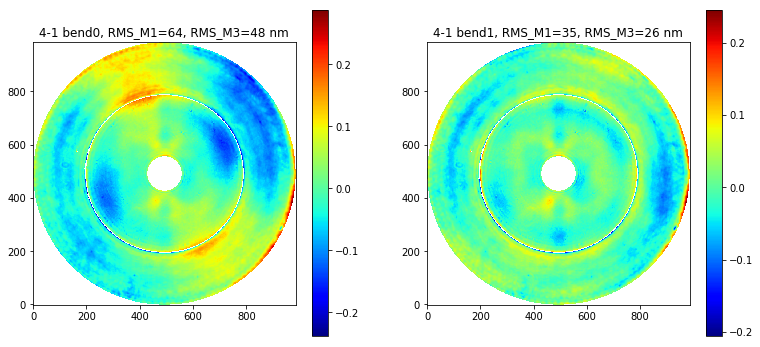

In [3]:
testID = '4-1'
iter = ' No Temp Comp'
fig, ax = plt.subplots(1,3,figsize=(20,6))
i = 0
for bend in range(2):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    pattern = '%s/Processed/%d_%s%s/M1M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)
    #print(pattern)
    fileset = sorted(glob.glob(pattern))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
    
    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms)) 
fig.delaxes(ax.flatten()[2])       

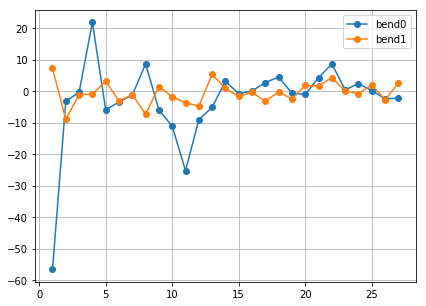

In [4]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(2):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
fig.delaxes(ax.flatten()[-1]) 

### The above with temperature compensation

4-1 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190211_4-1 With Temp Comp/M1M3 set0 190211 4-1.h5: Mon Feb 11 09:24:12 2019 
/Processed/190211_4-1 With Temp Comp/M1M3 set0 190211 4-1.h5: Mon Feb 11 09:27:56 2019 


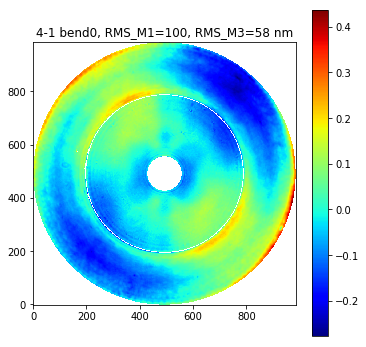

In [6]:
testID = '4-1'
iter = ' With Temp Comp'
fig, ax = plt.subplots(1,3,figsize=(20,6))
i = 0
for bend in range(1):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
    
    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms)) 
fig.delaxes(ax.flatten()[-1])       
fig.delaxes(ax.flatten()[-2]) 

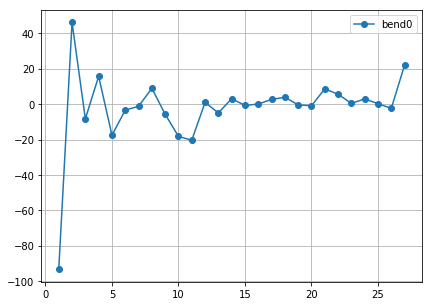

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(1):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
fig.delaxes(ax.flatten()[-1]) 

### Measure bending modes 25-27
#### First, M3 bending measurements, mode 25 - 27, then 2, 4, 20, 22 (for checking repeatibility)

4-2 bending mode 25 ------ irow = 0, icol = 0, -----------------------------
/Processed/190211_4-2/190211 4-2 M3 bm+25-1 burst20 morph.h5: Mon Feb 11 13:20:35 2019 
4-2 bending mode 25 ------ irow = 0, icol = 1, -----------------------------
/Processed/190211_4-2/190211 4-2 M3 bm-25-1 burst20 morph.h5: Mon Feb 11 13:21:39 2019 
4-2 bending mode 25 ------ irow = 0, icol = 2, -----------------------------
/Processed/190211_4-2/190211 4-2 M3 bm-25-2 burst20 morph.h5: Mon Feb 11 13:22:32 2019 
4-2 bending mode 25 ------ irow = 0, icol = 3, -----------------------------
/Processed/190211_4-2/190211 4-2 M3 bm+25-2 burst20 morph.h5: Mon Feb 11 13:23:36 2019 
4-2 bending mode 26 ------ irow = 1, icol = 0, -----------------------------
/Processed/190211_4-2/190211 4-2 M3 bm+26-1 burst20 morph.h5: Mon Feb 11 13:24:41 2019 
4-2 bending mode 26 ------ irow = 1, icol = 1, -----------------------------
/Processed/190211_4-2/190211 4-2 M3 bm-26-1 burst20 morph.h5: Mon Feb 11 13:25:45 2019 
4-2 bendin

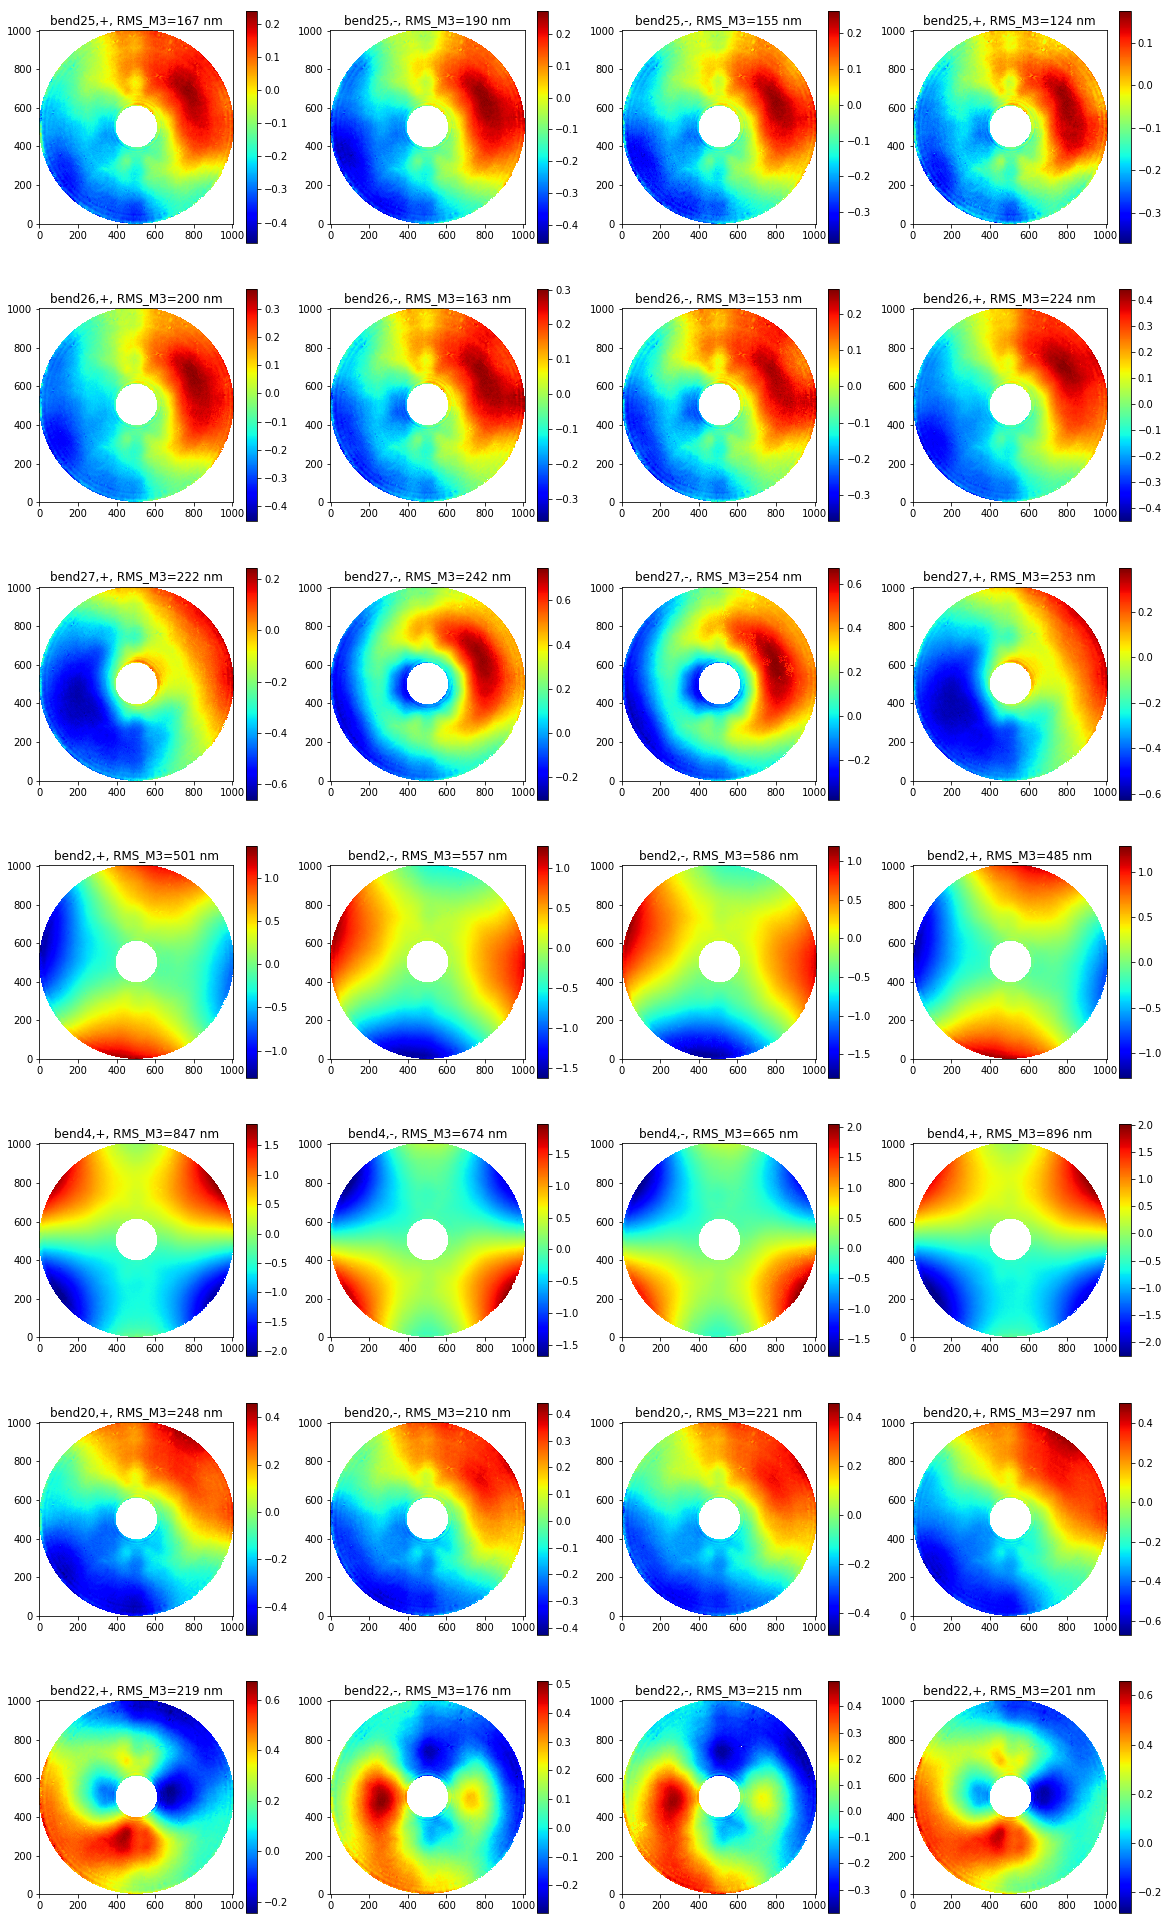

In [28]:
testID = '4-2' 
fig, ax = plt.subplots(7,4,figsize=(20,5*7))
i = 0
for modeID in [25, 26, 27, 2, 4, 20, 22]:
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, irow, icol))
        pattern = '%s/Processed/%d_%s/%d %s M3 bm%s*burst*morph.h5'%(
            dataDir, dateID, testID, dateID, testID, bend)
        fileset = sorted(glob.glob(pattern))
        #print(pattern)
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m3s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('bend%d,%s, RMS_M3=%.0f nm'%(modeID, bend[0], m3rms))

#### M1 bending modes measurements, 25-27, then 2, 4, 20, 22

4-2 bending mode 25 ------ irow = 0, icol = 0, -----------------------------
/Processed/190211_4-2/190211 4-2 M1 bm+25-1 burst50 morph.h5: Mon Feb 11 14:07:12 2019 
4-2 bending mode 25 ------ irow = 0, icol = 1, -----------------------------
/Processed/190211_4-2/190211 4-2 M1 bm-25-1 burst50 morph.h5: Mon Feb 11 14:10:15 2019 
4-2 bending mode 25 ------ irow = 0, icol = 2, -----------------------------
/Processed/190211_4-2/190211 4-2 M1 bm-25-2 burst50 morph.h5: Mon Feb 11 14:13:08 2019 
4-2 bending mode 25 ------ irow = 0, icol = 3, -----------------------------
/Processed/190211_4-2/190211 4-2 M1 bm+25-2 burst50 morph.h5: Mon Feb 11 14:16:11 2019 
4-2 bending mode 26 ------ irow = 1, icol = 0, -----------------------------
/Processed/190211_4-2/190211 4-2 M1 bm+26-1 burst50 morph.h5: Mon Feb 11 14:19:15 2019 
4-2 bending mode 26 ------ irow = 1, icol = 1, -----------------------------
/Processed/190211_4-2/190211 4-2 M1 bm-26-1 burst50 morph.h5: Mon Feb 11 14:22:19 2019 
4-2 bendin

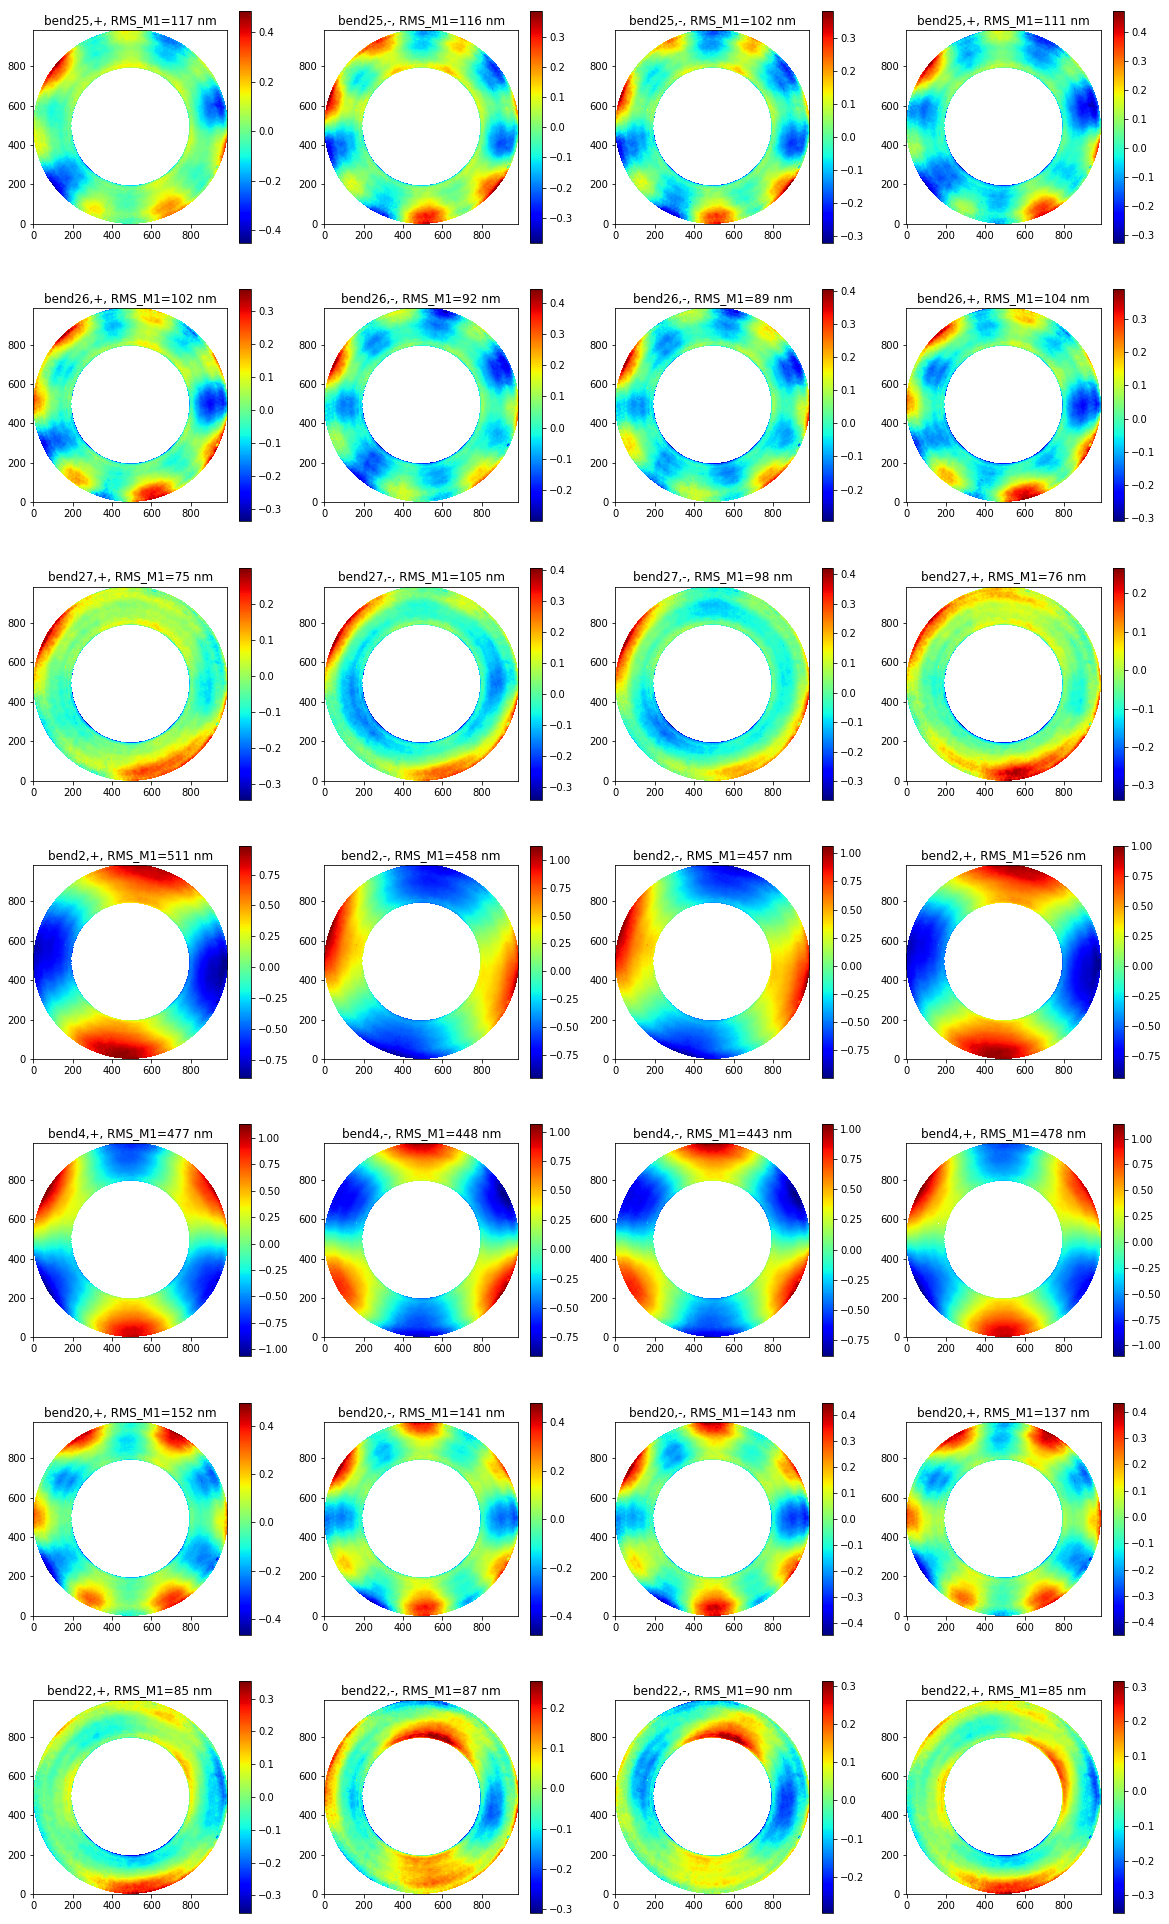

In [27]:
testID = '4-2' 
fig, ax = plt.subplots(7,4,figsize=(20,5*7))
i = 0
for modeID in [25, 26, 27, 2, 4, 20, 22]:
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, irow, icol))
        fileset = sorted(glob.glob('%s/Processed/%d_%s/%d %s M1 bm%s*burst*morph.h5'%(
            dataDir, dateID, testID, dateID, testID, bend)))
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('bend%d,%s, RMS_M1=%.0f nm'%(modeID, bend[0], m1rms))

### The measured bending modes
The amplitudes corresponds to 1N of RMS forces

4-2 bending mode 25 ------ irow = 0, icol = 0, -----------------------------
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-25.h5: date not in h5 file. 
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-25.h5: date not in h5 file. 
4-2 bending mode 26 ------ irow = 0, icol = 1, -----------------------------
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-26.h5: date not in h5 file. 
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-26.h5: date not in h5 file. 
4-2 bending mode 27 ------ irow = 0, icol = 2, -----------------------------
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-27.h5: date not in h5 file. 
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-27.h5: date not in h5 file. 
4-2 bending mode 2 ------ irow = 0, icol = 3, -----------------------------
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-2.h5: date not in h5 file. 
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-2.h

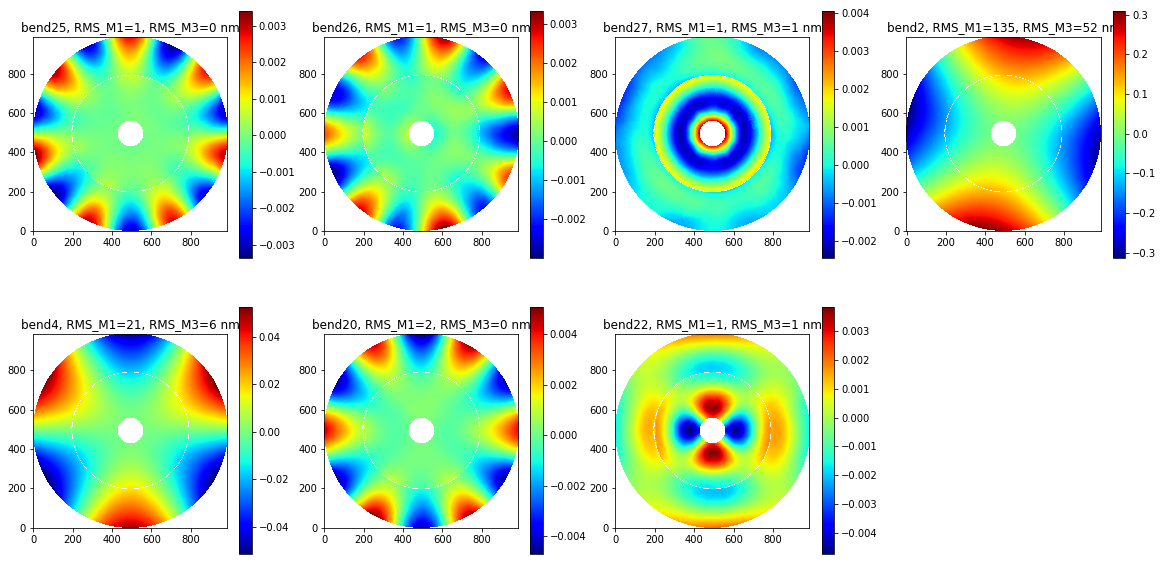

In [29]:
testID = '4-2' 
fig, ax = plt.subplots(2,4,figsize=(20,5*2))
i = 0
for modeID in [25, 26, 27, 2,4,20,22]:
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
        testID, modeID, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s/Combined/Combined*-%d.h5'%(
    dataDir, dateID, testID, modeID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset, '/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset, '/M3Data')

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

    img = ax[irow][icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(modeID, m1rms, m3rms))
fig.delaxes(ax.flatten()[-1])     

### Scaling factors that need to be added to the FEA bending modes
Plot the new factors together with those obtained on 190117 for bending modes 1-24

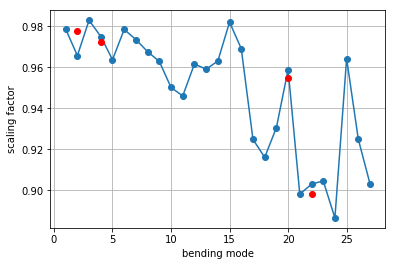

In [3]:
# for modes 1-24, read in results from 190117
# add modes 25,26,27
scaleF = np.zeros((27,1))
crossTalk = np.zeros((27, 27)) 
modeID = np.arange(1,28)
testID = '4-2' 
for i in modeID:
    if i<25:
        resultsFile = '%s/Processed/%d_%s Bending Modes/Combined/FitCoeff-Mode%d.csv'%(
            dataDir, 190117, '3-7', i)
    else:
        resultsFile = '%s/Processed/%d_%s/Combined/FitCoeff-Mode%d.csv'%(
            dataDir, dateID, testID, i)
    df = pd.read_csv(resultsFile, header=None)
    crossTalk[:, i-1] = df[2]
    scaleF[i-1] = max(df[2])
plt.plot(modeID, scaleF, '-o')
plt.grid()
plt.xlabel('bending mode')
plt.ylabel('scaling factor')

aa = np.hstack((modeID.reshape(-1,1), scaleF.reshape(-1,1), np.zeros((27,1))*np.nan))

# add remeasured 2,4,20,22
for i in [2, 4, 20, 22]:
    resultsFile = '%s/Processed/%d_%s/Combined/FitCoeff-Mode%d.csv'%(
        dataDir, dateID, testID, i)
    df = pd.read_csv(resultsFile, header=None)
    aa[aa[:,0]==i, 2] = max(df[2])
    plt.plot(i, max(df[2]),'ro')

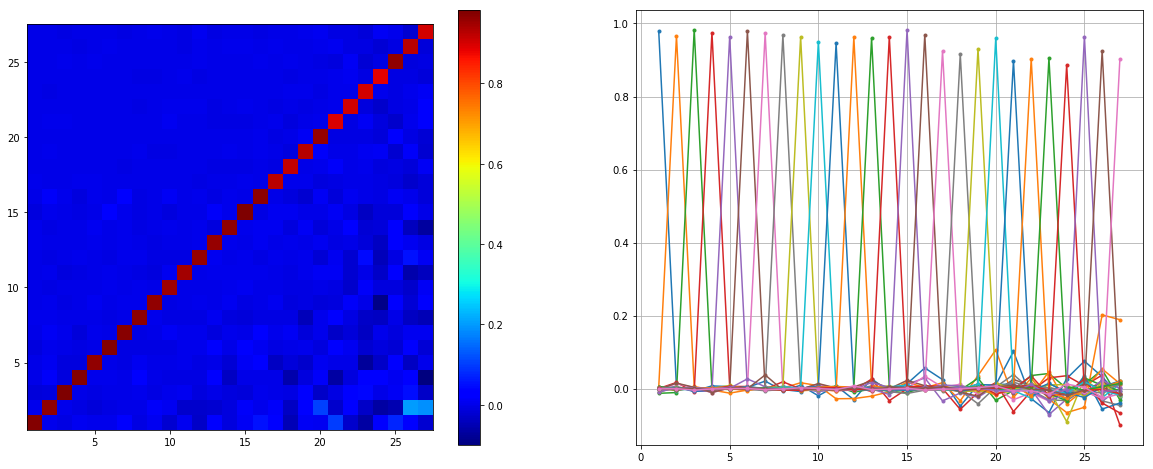

In [52]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
img = ax[0].imshow(crossTalk, origin='lower', extent=[0.5, 27.5, 0.5, 27.5])
plt.colorbar(img, ax=ax[0])
img = ax[1].plot(modeID, crossTalk.transpose(), '.-')
ax[1].grid()

### Modes 26 and 27 have bending mode 2 components up to 20%? 
* Mode 25 and 26 are a pair; mode 27 is the 3rd symmetric mode, after 3 and 12
* Must be thermal changes creeping in toward the end, presenting itself as astigmatisms (see residual maps below)

In [27]:
np.savetxt('data/ML_BM_scale.txt', aa, fmt = '%d\t %.5f \t %.5f',
           header='modeID\t scaleF\t scaleF_repeated',comments='')
np.savetxt('data/ML_BM_XTalk.txt', crossTalk)

### Residual maps from fitting to FEA bending modes

4-2 bending mode 25 ------ irow = 0, icol = 0, -----------------------------
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-25-Residual.h5: date not in h5 file. 
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-25-Residual.h5: date not in h5 file. 
4-2 bending mode 26 ------ irow = 0, icol = 1, -----------------------------
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-26-Residual.h5: date not in h5 file. 
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-26-Residual.h5: date not in h5 file. 
4-2 bending mode 27 ------ irow = 0, icol = 2, -----------------------------
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-27-Residual.h5: date not in h5 file. 
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-27-Residual.h5: date not in h5 file. 
4-2 bending mode 2 ------ irow = 0, icol = 3, -----------------------------
/Processed/190211_4-2/Combined/Combined M1M3 Map Mode number-2-Residual.h5: date not in h5 file. 
/

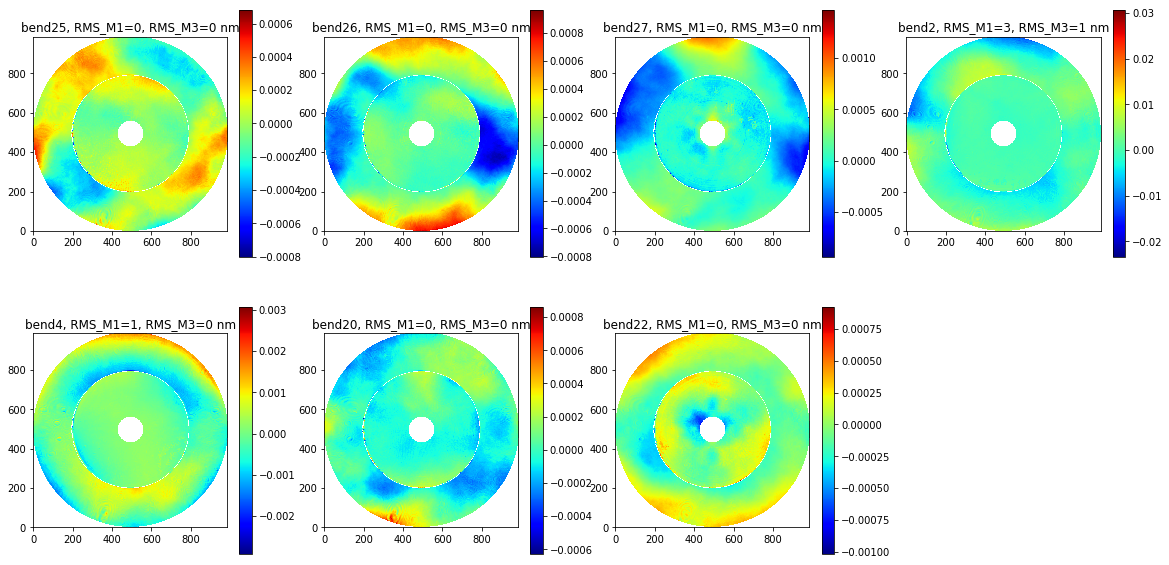

In [53]:
testID = '4-2' 
fig, ax = plt.subplots(2,4,figsize=(20,5*2))
i = 0
for modeID in [25, 26, 27, 2,4,20,22]:
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
        testID, modeID, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s/Combined/Combined*-%d-Residual.h5'%(
    dataDir, dateID, testID, modeID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset, '/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset, '/M3Data')

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

    img = ax[irow][icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(modeID, m1rms, m3rms))
fig.delaxes(ax.flatten()[-1])   